In the following I am just taking a very simple dataset to analyse a number of trends related to energy consumption and trade all over the world. I will be creating a few graphs to observe some of the trends, and maybe find out some insights. 

In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("_all_energy_statistics 2.csv")

df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1189482.0,2002.851554,7.167345e+00,1990.0,1997.0,2003.0,2009.0,2.014000e+03
quantity,1189482.0,184264.770050,1.585663e+07,-864348.0,14.0,189.0,2265.0,6.680329e+09
quantity_footnotes,163946.0,1.000000,0.000000e+00,1.0,1.0,1.0,1.0,1.000000e+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1189482 entries, 0 to 1189481
Data columns (total 7 columns):
country_or_area          1189482 non-null object
commodity_transaction    1189482 non-null object
year                     1189482 non-null int64
unit                     1189482 non-null object
quantity                 1189482 non-null float64
quantity_footnotes       163946 non-null float64
category                 1189482 non-null object
dtypes: float64(2), int64(1), object(4)
memory usage: 63.5+ MB


In [7]:
df_country=df[['country_or_area', 'quantity']].copy()
df_country = df_country.groupby(['country_or_area'], as_index=False)['quantity'].mean()
df_country.head()

,country_or_area,quantity
0,Afghanistan,14851.419961
1,Albania,4070.610624
2,Algeria,378028.739991
3,American Samoa,80.477658
4,Andorra,56.012547


In [8]:

df_sorted = df_country.iloc[df_country.quantity.argsort()[::-1]]
df_sorted.head()


,country_or_area,quantity
223,USSR (former),4.040380e+07
177,Russian Federation,2.886192e+06
84,"Germany, Fed. R. (former)",2.265316e+06
229,United States,2.178334e+06
174,Qatar,1.714711e+06


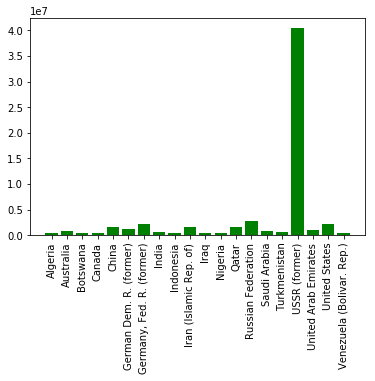

In [9]:
plt.bar(df_sorted.iloc[0:20,0], df_sorted.iloc[0:20,1], color='green')
plt.xticks(rotation='vertical')
plt.show()

The former USSR is an anomoly and is offsetting all the data. To look into it further, first I will remove that data point, to look at the rest of the data.

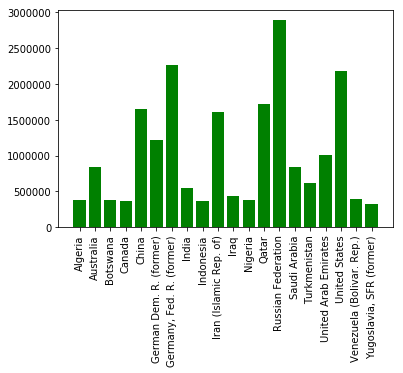

In [10]:
df_sorted = df_sorted.drop([223])
plt.bar(df_sorted.iloc[0:20,0], df_sorted.iloc[0:20,1], color='green')
plt.xticks(rotation='vertical')
plt.show()

Clearly, all other states are relatively proportional. Let's look into the USSR

In [26]:
df_USSR = df[df['country_or_area'] == 'USSR (former)']
df_USSR.head()
df_USSRyear = df_USSR.groupby(['year'],as_index=False)['quantity'].sum()

df_USSR.head()


,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
14895,USSR (former),Aviation gasoline - Exports,1991,"Metric tons, thousand",1.0,NaN,aviation_gasoline
14896,USSR (former),Aviation gasoline - Exports,1990,"Metric tons, thousand",34.0,NaN,aviation_gasoline
23419,USSR (former),Aviation gasoline - Production,1991,"Metric tons, thousand",380.0,NaN,aviation_gasoline
23420,USSR (former),Aviation gasoline - Production,1990,"Metric tons, thousand",451.0,NaN,aviation_gasoline
24182,USSR (former),Aviation gasoline - production from refineries,1991,"Metric tons, thousand",380.0,NaN,aviation_gasoline


In [29]:
df_USSRyear.head()


,year,quantity
0,1990,1.359064e+10
1,1991,5.506899e+08


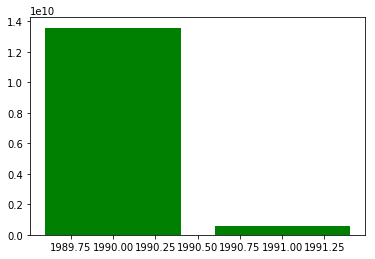

In [35]:
plt.bar(df_USSRyear['year'], df_USSRyear['quantity'],color='green')
plt.show()

Not too much of a difference in terms of overall energy usage in both years. (Btw, really suprising that the usage is within two years and yet so much higher than all the rest) 

In [14]:
df_USSRcomm = df_USSR.groupby(['commodity_transaction'])['quantity'].sum()
df_USSRcomm.head()

commodity_transaction
Aviation gasoline - Exports                        35.0
Aviation gasoline - Production                    831.0
Aviation gasoline - Total energy supply           796.0
Aviation gasoline - production from refineries    831.0
Bitumen - Exports                                 168.0
Name: quantity, dtype: float64

That makes sense, since both high values have to do with production. Though, that does mean that the previous results were wrong, since some of it is export, and some is production. I need to either use RegEx or NLPK to analyse this column and separate the data according to transactions. Just want to do one last test.

In [15]:
df_USSRcat = df_USSR.groupby(['category'])['quantity'].sum()



Highest energy category is in brown_coal, though it is unknown whether it is a production, export or somethin else. 

In [16]:
df_USSR['commodity_transaction'].value_counts()

From combustible fuels – Main activity                                           4
Petroleum coke - Total energy supply                                             2
Natural gas (including LNG) - imports                                            2
Heat - Own use by electricity, CHP and heat plants                               2
Bitumen - Imports                                                                2
Electricity - total thermal production                                           2
Geothermal – Main activity                                                       2
Lubricants - Exports                                                             2
Peat (for fuel use) - Total energy supply                                        2
Gas Oil/ Diesel Oil - Total energy supply                                        2
Brown coal briquettes - exports                                                  2
Petroleum coke - Production                                                      2
Pate

In [19]:
df_US = df[df['country_or_area'] == 'United States']
df_US['commodity_transaction'].value_counts().head()

From combustible fuels – Main activity                 50
From combustible fuels – Main activity – CHP plants    50
From combustible fuels – Autoproducer – CHP plants     35
From combustible fuels – Autoproducer                  35
Natural gas liquids - Production                       25
Name: commodity_transaction, dtype: int64

In [21]:
df_US['category'].value_counts()

total_electricity                                              1512
natural_gas_including_lng                                      1077
gas_oil_diesel_oil                                              914
hard_coal                                                       852
other_bituminous_coal                                           800
fuel_oil                                                        781
liquified_petroleum_gas                                         689
electricity_net_installed_capacity_of_electric_power_plants     679
brown_coal                                                      672
heat                                                            658
sub_bituminous_coal                                             618
motor_gasoline                                                  551
lignite                                                         479
other_kerosene                                                  430
industrial_waste                                

In [22]:
df_US['year'].value_counts()

2013    949
2012    946
2014    921
2009    884
2011    873
2005    871
2010    870
2007    866
2008    861
2006    859
2004    854
2003    833
2002    811
2000    763
2001    762
1999    761
1997    730
1998    720
1996    714
1995    713
1993    697
1994    680
1992    655
1991    628
1990    626
Name: year, dtype: int64

In [24]:
df['year'].value_counts()

2014    56264
2013    56109
2012    55838
2011    55214
2010    54544
2008    53852
2009    53769
2007    52248
2006    49397
2005    49203
2004    47723
2003    46922
2002    46520
2001    45609
2000    45220
1999    44682
1997    44579
1998    44487
1996    43550
1995    43515
1993    43112
1994    42787
1992    41753
1990    36305
1991    36280
Name: year, dtype: int64

This means that the data can be evaluated with two things in mind: comparing the amount of production versus export and uses of the type of energy over the years. The data will have to be cleaned up since not all the countries have all the data for the years specified. Therefore the main thing now is to find a way to group aspects into one based on text, which can change. Finally I will have to separate USSR from the rest, since it gives quite an offset and therefore will hvae to be treated on its own. 

In [37]:
import nltk